In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.colors import ListedColormap
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, RocCurveDisplay, DetCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import sklearn

from sklearn.metrics import confusion_matrix  # for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm  # support vector Machine
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.naive_bayes import GaussianNB  # Naive bayes

import warnings
warnings.filterwarnings('ignore')


sns.set()

# Загружаем csv, смотрим параметры, чистим данные

In [8]:
train = pd.read_csv('income_train.csv')
test = pd.read_csv('income_test.csv')
print(train.shape)
print(test.shape)
display(train)

(26048, 15)
(6513, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Self-emp-not-inc,112497,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,39,Private,278557,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1628,48,United-States,<=50K
2,33,Private,173858,Bachelors,13,Married-civ-spouse,Adm-clerical,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
3,35,?,120074,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,United-States,<=50K
4,21,Private,199915,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,34,Private,244147,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
26044,38,Private,103323,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,40,United-States,>50K
26045,24,Private,117167,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,53,United-States,<=50K
26046,24,Private,235071,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K


In [9]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.573480,1.898020e+05,10.088874,1068.759598,88.646422,40.451973
std,13.621556,1.050073e+05,2.575100,7282.271422,406.059200,12.320676
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.183090e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376340e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       26048 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education-num   26048 non-null  int64 
 5   marital-status  26048 non-null  object
 6   occupation      26048 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital-gain    26048 non-null  int64 
 11  capital-loss    26048 non-null  int64 
 12  hours-per-week  26048 non-null  int64 
 13  native-country  26048 non-null  object
 14  income          26048 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [11]:
print(train.isin(['?']).sum(axis=0))
print(test.isin(['?']).sum(axis=0))

age                  0
workclass         1501
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1506
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     468
income               0
dtype: int64
age                 0
workclass         335
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        337
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    115
dtype: int64


In [12]:
pd.DataFrame(train.fnlwgt.unique())

,0
0,112497
1,278557
2,173858
3,120074
4,199915
...,...
18380,239880
18381,168863
18382,201595
18383,342834


# Фрейм для удаления строк с '?' из теста для вас!

In [13]:
list_to_delete = test[(test['native-country'] == '?') | (test['occupation'] == '?') | (test['workclass'] == '?')]

indexes_to_delete = list_to_delete.index.tolist()

display(list_to_delete)
display(indexes_to_delete)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22,64,?,267198,Prof-school,15,Married-civ-spouse,?,Husband,White,Male,0,0,16,United-States
43,26,?,133373,Bachelors,13,Never-married,?,Own-child,White,Male,0,0,44,United-States
64,61,State-gov,124971,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?
92,19,?,113915,HS-grad,9,Never-married,?,Own-child,Black,Male,0,0,10,United-States
93,21,?,253190,Some-college,10,Never-married,?,Own-child,White,Male,0,0,48,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,42,Self-emp-inc,191196,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,60,?
6471,30,?,298577,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,30,United-States
6482,55,Private,98361,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,?
6498,80,?,281768,Assoc-acdm,12,Married-civ-spouse,?,Husband,White,Male,0,0,4,United-States


Int64Index([  22,   43,   64,   92,   93,  100,  117,  118,  127,  187,
            ...
            6384, 6399, 6408, 6414, 6427, 6433, 6471, 6482, 6498, 6512],
           dtype='int64', length=448)

In [14]:
train['native-country'] = train['native-country'].replace('?', np.nan)
train['workclass'] = train['workclass'].replace('?', np.nan)
train['occupation'] = train['occupation'].replace('?', np.nan)

test['native-country'] = test['native-country'].replace('?', np.nan)
test['workclass'] = test['workclass'].replace('?', np.nan)
test['occupation'] = test['occupation'].replace('?', np.nan)

# удаляем строки с вопросами
train.dropna(how='any', inplace=True)
display(train.head())
print(train.shape )

test.dropna(how='any', inplace=True)
display(test.head())
print(test.shape)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Self-emp-not-inc,112497,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,39,Private,278557,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1628,48,United-States,<=50K
2,33,Private,173858,Bachelors,13,Married-civ-spouse,Adm-clerical,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
4,21,Private,199915,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
5,20,Private,745817,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,15,United-States,<=50K


(24097, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,43,Private,154076,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
1,58,Private,236596,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
2,37,Self-emp-inc,51264,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3,42,Private,250121,11th,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
4,40,Self-emp-not-inc,89413,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1672,40,United-States


(6065, 14)


# Сплитуем данные

In [15]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(16867, 14)
(7230, 14)


# Заменяем категориальные данные на числовые

In [16]:
income = {"<=50K": 0, ">50K": 1}
y_train = y_train.apply(lambda x: income[x])
y_test = y_test.apply(lambda x: income[x])

In [17]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
X_train[['sex', 'race', 'marital-status', 'workclass', 'education', 'occupation', 'relationship', 'native-country']] = encoder.fit_transform(X_train[['sex', 'race', 'marital-status', 'workclass', 'education', 'occupation', 'relationship', 'native-country']], y_train)
X_test[['sex', 'race', 'marital-status', 'workclass', 'education', 'occupation', 'relationship', 'native-country']] = encoder.fit_transform(X_test[['sex', 'race', 'marital-status', 'workclass', 'education', 'occupation', 'relationship', 'native-country']], y_test)

In [18]:
# from category_encoders import OneHotEncoder
# enc = OneHotEncoder(cols=['marital-status', 'occupation', 'relationship']).fit(X_train, y_train)
# X_train = enc.transform(X_train)

In [19]:
# enc1 = OneHotEncoder(cols=['marital-status', 'occupation', 'relationship']).fit(X_test, y_test)
# X_test = enc1.transform(X_test)

In [20]:
# # sex
# X_train['sex'] = X_train['sex'].map({'Male': 0,
#                                  'Female': 1}).astype(int)
# X_test['sex'] = X_test['sex'].map({'Male': 0,
#                                  'Female': 1}).astype(int)
# # race
# X_train['race'] = X_train['race'].map({'Black': 0,
#                                    'Asian-Pac-Islander': 1,
#                                    'Other': 2,
#                                    'White': 3,
#                                    'Amer-Indian-Eskimo': 4}).astype(int)
# X_test['race'] = X_test['race'].map({'Black': 0,
#                                    'Asian-Pac-Islander': 1,
#                                    'Other': 2,
#                                    'White': 3,
#                                    'Amer-Indian-Eskimo': 4}).astype(int)
# # marital
# train['marital-status'] = train['marital-status'].map({'Married-spouse-absent': 0,
#                                                        'Widowed': 1,
#                                                        'Married-civ-spouse': 2,
#                                                        'Separated': 3,
#                                                        'Divorced': 4,
#                                                        'Never-married': 5,
#                                                        'Married-AF-spouse': 6}).astype(int)
# # workclass
# train['workclass'] = train['workclass'].map({'Self-emp-inc': 0,
#                                              'State-gov': 1,
#                                              'Federal-gov': 2,
#                                              'Without-pay': 3,
#                                              'Local-gov': 4,
#                                              'Private': 5,
#                                              'Self-emp-not-inc': 6}).astype(int)
# # education
# train['education'] = train['education'].map({'Some-college': 0,
#                                              'Preschool': 1,
#                                              '5th-6th': 2,
#                                              'HS-grad': 3,
#                                              'Masters': 4,
#                                              '12th': 5,
#                                              '7th-8th': 6,
#                                              'Prof-school': 7,
#                                              '1st-4th': 8,
#                                              'Assoc-acdm': 9,
#                                              'Doctorate': 10,
#                                              '11th': 11,
#                                              'Bachelors': 12,
#                                              '10th': 13,
#                                              'Assoc-voc': 14,
#                                              '9th': 15}).astype(int)
# # occupation
# train['occupation'] = train['occupation'].map({'Farming-fishing': 1,
#                                                'Tech-support': 2,
#                                                'Adm-clerical': 3,
#                                                'Handlers-cleaners': 4,
#                                                'Prof-specialty': 5,
#                                                'Machine-op-inspct': 6,
#                                                'Exec-managerial': 7,
#                                                'Priv-house-serv': 8,
#                                                'Craft-repair': 9,
#                                                'Sales': 10,
#                                                'Transport-moving': 11,
#                                                'Armed-Forces': 12,
#                                                'Other-service': 13,
#                                                'Protective-serv': 14}).astype(int)
# # relationship
# train['relationship'] = train['relationship'].map({'Not-in-family': 0,
#                                                    'Wife': 1,
#                                                    'Other-relative': 2,
#                                                    'Unmarried': 3,
#                                                    'Husband': 4,
#                                                    'Own-child': 5}).astype(int)

# Смотрим корреляцию между признаками

<AxesSubplot:>

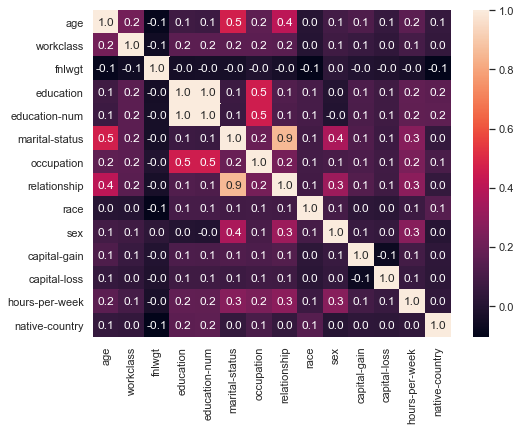

In [21]:
plt.figure(figsize=(8, 6))

sns.heatmap(X_train.corr(method='spearman'), annot=True, fmt=".1f")

# Убираем ненужные параметры с минимальной важностью (см. файл фичинг)

In [22]:
X_train = X_train.drop(['sex', 'race', 'fnlwgt', 'native-country', 'education', 'workclass'], axis=1)
X_test = X_test.drop(['sex', 'race', 'fnlwgt', 'native-country', 'education', 'workclass'], axis=1)

In [23]:
X_test

,age,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
21876,18,10,0.046160,0.074627,0.007561,0,1602,35
8955,50,14,0.046160,0.465481,0.112851,0,0,38
2410,28,13,0.046160,0.126984,0.112851,4101,0,60
1135,29,9,0.469837,0.233369,0.475618,0,0,40
24166,35,10,0.079295,0.233369,0.112851,0,0,40
...,...,...,...,...,...,...,...,...
22417,41,10,0.469837,0.465481,0.475618,0,0,40
14364,48,10,0.469837,0.126984,0.475309,0,0,37
21140,20,10,0.046160,0.044619,0.007561,0,0,50
13209,28,13,0.046160,0.465481,0.007561,0,0,40


# Нормализуем 2 столбца с ненормальным распределением путем логарифмирования

In [24]:
X_train['capital-gain'] = np.log(X_train['capital-gain']+1)
X_train['capital-loss'] = np.log(X_train['capital-loss']+1)
X_test['capital-gain'] = np.log(X_test['capital-gain']+1)
X_test['capital-loss'] = np.log(X_test['capital-loss']+1)

# Прогоняем данные по разным моделям, чтобы понять какая из них изначально лучше справляется

In [25]:
# Gaussian Naive Bayes
from sklearn.metrics import f1_score
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

score_gaussian = gaussian.score(X_test, y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8145228215767635


In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

score_knn = knn.score(X_test, y_test)
print('The accuracy of the KNN Model is', score_knn)

The accuracy of the KNN Model is 0.7970954356846474


In [27]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

score_logreg = logreg.score(X_test, y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8384508990318119


In [28]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.84149377593361


In [29]:
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.870
Правильность на тестовом наборе: 0.858


Судя по результатам, лучше всего справляется Рандомный лес и Градиентный бустинг

In [30]:
from sklearn.feature_selection import SelectFromModel
forest = RandomForestClassifier(n_estimators=50, max_features='sqrt', min_samples_leaf=5)
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(
    forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(
    forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.880
Правильность на тестовом наборе: 0.856


(0.7, 1.01)

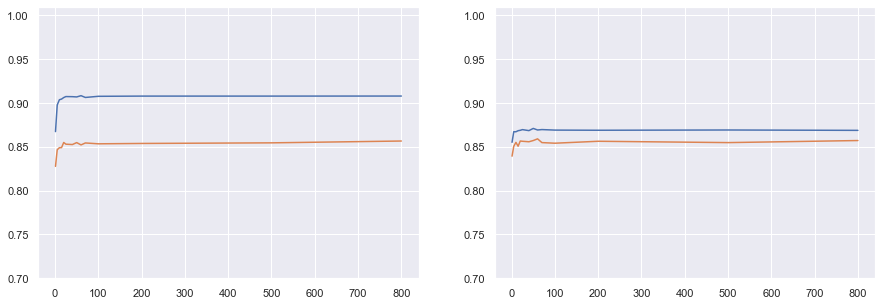

In [31]:
sc_train1 = []
sc_test1 = []
sc_train2 = []
sc_test2 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 800]
for n in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=n, max_depth=20, min_samples_split=10, max_features = 'sqrt')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=n, max_features='sqrt',max_depth=9, n_jobs=-1)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators, sc_train1)
ax1.plot(n_estimators, sc_test1)
ax1.set_ylim(0.7, 1.01)
ax2.plot(n_estimators, sc_train2)
ax2.plot(n_estimators, sc_test2)
ax2.set_ylim(0.7, 1.01)

# Попробую подобрать лучшую модель для RandomForest через решетку

In [27]:
params = {'max_depth': [3, 5, 8, 10, 20, 30, None],
          'min_samples_leaf': [1, 2, 4, 6],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [10, 25, 50, 100, 200, 400, 600, 800, 1000]}

rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, scoring='f1',
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 25, 50, 100, 200, 400, 600, 800,
                                          1000]},
             scoring='f1', verbose=2)

In [28]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(min_samples_leaf=4, n_estimators=50)


In [29]:
gridresults = pd.DataFrame(grid_search.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,704,479,495,325,676,332,497,337,339,612,...,99,0,63,54,72,81,36,91,27,90
mean_fit_time,0.433547,0.354856,0.076269,0.154871,0.204173,6.104414,0.327607,1.168218,3.492695,0.083659,...,0.0445,0.039338,0.03899,0.041202,0.035246,0.044663,0.037611,0.109385,0.042749,0.054206
std_fit_time,0.012728,0.007463,0.00178,0.00316,0.011432,0.044831,0.004668,0.02048,0.038086,0.00409,...,0.009166,0.008172,0.003123,0.004111,0.000241,0.001775,0.000243,0.006699,0.000536,0.004934
mean_score_time,0.056817,0.051689,0.011199,0.020596,0.027944,0.686054,0.046268,0.13756,0.411655,0.014957,...,0.005433,0.006617,0.005849,0.00557,0.005047,0.006569,0.008546,0.014997,0.004998,0.009943
std_score_time,0.002033,0.003844,0.001171,0.001545,0.001655,0.009896,0.002104,0.001773,0.006653,0.000343,...,0.000117,0.00177,0.000985,0.000739,0.000062,0.001161,0.002599,0.001545,0.000079,0.002708
param_max_depth,None,20,20,10,None,10,20,10,10,30,...,3,3,3,3,3,3,3,3,3,3
param_min_samples_leaf,4,2,4,1,2,1,4,1,1,4,...,6,1,4,4,4,6,2,6,2,6
param_min_samples_split,2,10,5,2,2,2,5,5,5,10,...,10,2,5,2,10,2,5,5,2,5
param_n_estimators,50,50,10,25,25,1000,50,200,600,10,...,10,10,10,10,10,10,10,25,10,10
params,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...","{'max_depth': 20, 'min_samples_leaf': 2, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': None, 'min_samples_leaf': 2, 'mi...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",...,"{'max_depth': 3, 'min_samples_leaf': 6, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 6, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 6, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...","{'max_depth': 3, 'min_samples_leaf': 6, 'min_s..."
split0_test_score,0.671283,0.67101,0.670978,0.666667,0.667197,0.670004,0.67671,0.667225,0.666667,0.665859,...,0.587309,0.610261,0.599453,0.560382,0.614828,0.602487,0.590028,0.611893,0.611385,0.578802


Правильность на обучающем наборе: 0.882
Правильность на тестовом наборе: 0.859


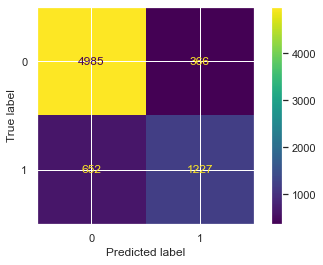

In [43]:
rf_best = RandomForestClassifier(
max_depth=None, min_samples_leaf = 4, min_samples_split = 2, n_estimators=50)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
print('Правильность на обучающем наборе: {:.3f}'.format(
    rf_best.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(
    rf_best.score(X_test, y_test)))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5351
           1       0.77      0.65      0.71      1879

    accuracy                           0.86      7230
   macro avg       0.83      0.79      0.81      7230
weighted avg       0.85      0.86      0.86      7230



# Решетка для градиентного бустинга

In [32]:
from sklearn.metrics import balanced_accuracy_score

In [34]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    "n_estimators":[200, 500, 1000, 1200, 1500]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='balanced_accuracy', cv=5, n_jobs=-1, verbose=2)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


Fitting 5 folds for each of 210 candidates, totalling 1050 fits
0.7951587675890556


In [35]:
print(clf.best_params_)
print(clf.best_estimator_)

{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='log2',
                           n_estimators=500)


In [36]:
gridresults = pd.DataFrame(clf.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,67,69,98,68,62,128,186,63,92,126,...,208,179,173,209,10,203,204,174,0,5
mean_fit_time,4.788624,7.221514,5.775054,5.768864,5.605707,5.852899,2.443192,6.775076,5.659804,2.427121,...,22.472978,27.200996,25.01358,23.505486,1.540612,25.399623,31.579177,31.676133,1.022767,0.869683
std_fit_time,0.024806,0.025583,0.047601,0.038484,0.016947,0.060023,0.026227,0.081151,0.110951,0.015071,...,0.803889,0.138423,0.164748,1.763832,0.012156,0.25289,0.073619,0.114646,0.020007,0.026381
mean_score_time,0.054846,0.077527,0.066087,0.062627,0.051804,0.063738,0.029768,0.059882,0.051884,0.031128,...,0.244828,0.305156,0.239974,0.245135,0.024173,0.246254,0.309101,0.306285,0.016667,0.015897
std_score_time,0.004184,0.003295,0.003899,0.003333,0.002998,0.001898,0.002054,0.002161,0.003375,0.000744,...,0.014343,0.004432,0.004583,0.025504,0.002284,0.006628,0.007938,0.005307,0.003736,0.002418
param_learning_rate,0.05,0.05,0.075,0.05,0.05,0.1,0.2,0.05,0.075,0.1,...,0.2,0.15,0.15,0.2,0.01,0.2,0.2,0.15,0.01,0.01
param_max_depth,3,3,3,3,3,3,3,3,3,3,...,8,8,8,8,5,8,8,8,3,3
param_max_features,sqrt,sqrt,sqrt,sqrt,log2,sqrt,sqrt,log2,log2,sqrt,...,sqrt,sqrt,log2,sqrt,log2,log2,log2,log2,log2,sqrt
param_n_estimators,1000,1500,1200,1200,1000,1200,500,1200,1000,500,...,1200,1500,1200,1500,200,1200,1500,1500,200,200
params,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...","{'learning_rate': 0.05, 'max_depth': 3, 'max_f...","{'learning_rate': 0.075, 'max_depth': 3, 'max_...","{'learning_rate': 0.05, 'max_depth': 3, 'max_f...","{'learning_rate': 0.05, 'max_depth': 3, 'max_f...","{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...","{'learning_rate': 0.2, 'max_depth': 3, 'max_fe...","{'learning_rate': 0.05, 'max_depth': 3, 'max_f...","{'learning_rate': 0.075, 'max_depth': 3, 'max_...","{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",...,"{'learning_rate': 0.2, 'max_depth': 8, 'max_fe...","{'learning_rate': 0.15, 'max_depth': 8, 'max_f...","{'learning_rate': 0.15, 'max_depth': 8, 'max_f...","{'learning_rate': 0.2, 'max_depth': 8, 'max_fe...","{'learning_rate': 0.01, 'max_depth': 5, 'max_f...","{'learning_rate': 0.2, 'max_depth': 8, 'max_fe...","{'learning_rate': 0.2, 'max_depth': 8, 'max_fe...","{'learning_rate': 0.15, 'max_depth': 8, 'max_f...","{'learning_rate': 0.01, 'max_depth': 3, 'max_f...","{'learning_rate': 0.01, 'max_depth': 3, 'max_f..."
split0_test_score,0.708861,0.706507,0.710491,0.708777,0.705333,0.708693,0.701661,0.70494,0.707057,0.70494,...,0.644195,0.637571,0.635669,0.639645,0.6427,0.640101,0.640506,0.637335,0.619083,0.621155


Правильность на обучающем наборе: 0.891
Правильность на тестовом наборе: 0.856


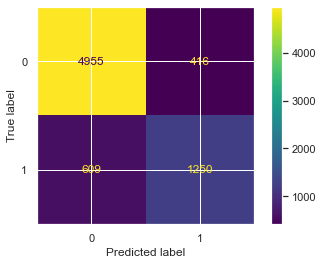

In [36]:
gbrt_best = GradientBoostingClassifier(
learning_rate=0.05, max_depth=5, max_features='log2', n_estimators=500)
gbrt_best.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print('Правильность на обучающем наборе: {:.3f}'.format(
    gbrt_best.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(
    gbrt_best.score(X_test, y_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5371
           1       0.75      0.67      0.71      1859

    accuracy                           0.86      7230
   macro avg       0.82      0.80      0.81      7230
weighted avg       0.85      0.86      0.86      7230



Таким образом, лучшая модель(gbrt_best) была получена способом градиентного бустинга: accuracy = 0.86, f1 = 0.727